# Assignment II: Clustering

In [1]:
import pandas as pd
import numpy as np

## Data: Credit Card User Data
For this assignment, we use credit card data from 9000 users. Source: https://www.kaggle.com/arjunbhasin2013/ccdata

In [2]:
#get the data
!git clone https://github.com/keuperj/DATA.git

fatal: destination path 'DATA' already exists and is not an empty directory.


In [3]:
data = pd.read_csv("DATA/CC GENERAL.csv")

In [4]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Task 1: clean the data and perform a basic EDA
* check for missing values and NAN
* compute basic statistics
* check for carrelations in the data

In [22]:
data.isna().any() #check Nan by variables

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [23]:
data.fillna(0, inplace=True) #replace NaN with zeros

In [24]:
data.replace([np.inf, -np.inf], 0, inplace=True) #also replace of inf values

In [25]:
#basic statistics
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4493.947277,1733.143852,833.983453,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.922543,2895.063757,2335.989918,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,163.028164,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,289.628402,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


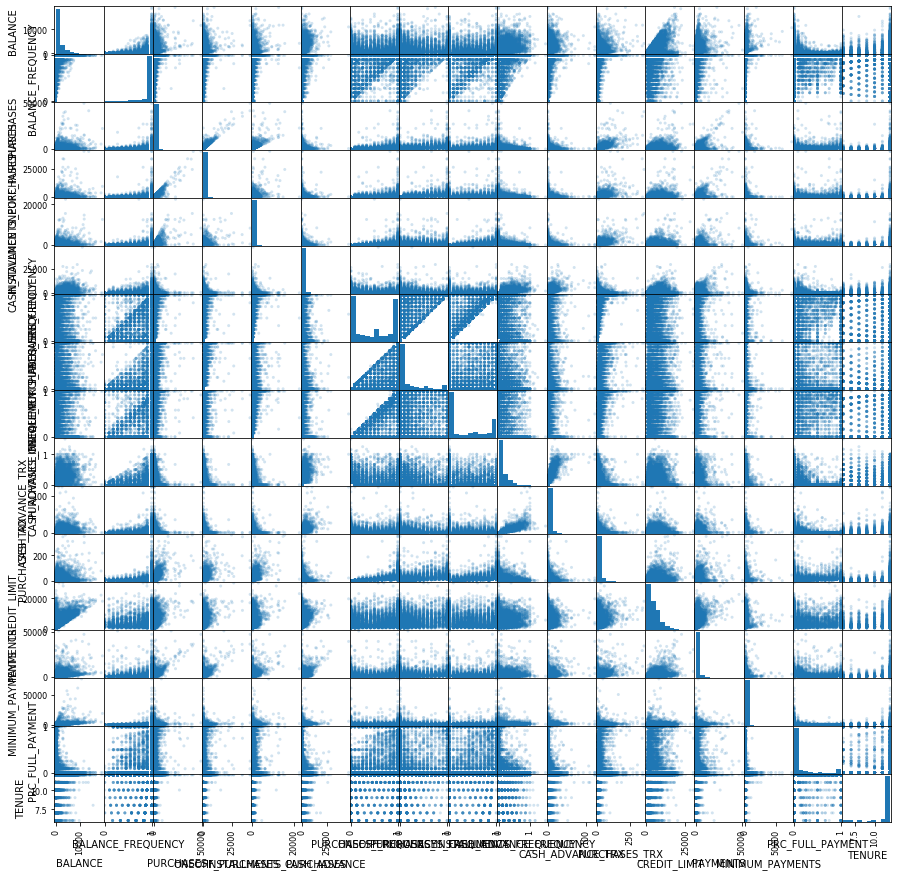

In [28]:
#plot correlations and variable distributions
_=pd.plotting.scatter_matrix(data, alpha=0.2, figsize=(15,15))

### Task 2: Cluster the creditcard users into sub-groups. Perform a statistical analysis of these groups.
* use a Scikit-Learn clustering *K-Means* and *DBSCAN* clustering to group the users 
* analyze the key differences between the user groups: use simple statistics 

In [37]:
data['CUST_ID'] #here we have strings

0       C10001
1       C10002
2       C10003
3       C10004
4       C10005
         ...  
8945    C19186
8946    C19187
8947    C19188
8948    C19189
8949    C19190
Name: CUST_ID, Length: 8950, dtype: object

In [41]:
data=data.drop(columns=['CUST_ID']) #drop non numerical data

In [42]:
# get data as numpy
X=data.to_numpy(dtype='float') #data type float

In [43]:
X.shape

(8950, 17)

In [44]:
X

array([[4.09007490e+01, 8.18182000e-01, 9.54000000e+01, ...,
        1.39509787e+02, 0.00000000e+00, 1.20000000e+01],
       [3.20246742e+03, 9.09091000e-01, 0.00000000e+00, ...,
        1.07234022e+03, 2.22222000e-01, 1.20000000e+01],
       [2.49514886e+03, 1.00000000e+00, 7.73170000e+02, ...,
        6.27284787e+02, 0.00000000e+00, 1.20000000e+01],
       ...,
       [2.33986730e+01, 8.33333000e-01, 1.44400000e+02, ...,
        8.24183690e+01, 2.50000000e-01, 6.00000000e+00],
       [1.34575640e+01, 8.33333000e-01, 0.00000000e+00, ...,
        5.57556280e+01, 2.50000000e-01, 6.00000000e+00],
       [3.72708075e+02, 6.66667000e-01, 1.09325000e+03, ...,
        8.82889560e+01, 0.00000000e+00, 6.00000000e+00]])

In [86]:
#normalize data
from sklearn.preprocessing import normalize
X=normalize(X, axis=0 )#normalize each variable

In [87]:
#K-MEANS
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=0).fit(X)

In [88]:
y_kmeans = kmeans.predict(X) #get cluster assignments

In [129]:
#DB-Scan
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.01, min_samples=3) #set epsilon 

In [130]:
y_dbscan = dbscan.fit_predict(X) #get cluster assignments

In [131]:
#get number of clusters in dbscan (k-means was 10)
np.unique(y_dbscan)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57])

In [132]:
y_dbscan

array([-1,  0,  0, ..., -1, -1, -1])

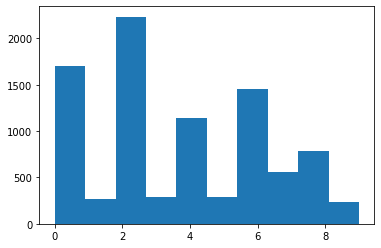

In [133]:
#Plot histograms to compare clustering
import matplotlib.pyplot as plt

_=plt.hist(y_kmeans)

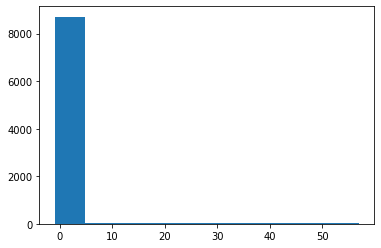

In [134]:
_=plt.hist(y_dbscan)

In [121]:
# DBscan does not get clear clusters for the used parameters -> go back and adjust

In [84]:
#statistics ob K-Means Clusters
data['cluster']=y_kmeans #add colum with cluster IDs to original dataframe


In [135]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,8


In [136]:
groups=data.groupby('cluster') #group by the cluster IDs

In [137]:
groups.describe() #get variable statistics by group

BALANCE                                                     \
          count         mean          std         min          25%   
cluster                                                              
0        2616.0   362.699096   737.644806    0.000000    18.904359   
1        1067.0  2392.970472  2013.606638    1.691842   938.696241   
2         546.0  1338.233049  1591.624067    0.000000   241.264099   
3         686.0   384.427192   709.028028    0.000000    64.733303   
4         731.0  1728.045823  1935.551120    0.000000   429.644289   
5         180.0  2086.999515  1798.245516   70.794108  1027.796519   
6         632.0  1910.484788  2131.453404    0.000000   587.103684   
7         405.0  2197.109625  2323.075619   70.954998  1022.687467   
8        1551.0  3341.866305  2653.184352  137.507638  1382.769277   
9         536.0  1093.629195  1505.975351    6.793588   292.405455   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
cluster                                                                       
0          62.304353   284.794383   5462.897068            2616.0  0.757495   
1        1806.845374  3241.788403  11581.933500            1067.0  0.887748   
2         836.862280  1816.041492  13763.473580             546.0  0.801859   
3         139.480392   345.449234   6725.109914             686.0  0.895327   
4        1031.670316  2322.933656  15244.748650             731.0  0.936017   
5        1500.634512  2570.055099  10571.411070             180.0  0.981116   
6        1131.606614  2338.419992  14581.459140             632.0  0.884939   
7        1370.317105  2347.486095  19043.138560             405.0  0.992847   
8        2408.162021  4659.886479  18495.558550            1551.0  0.998357   
9         561.174678  1226.250501  13479.288210             536.0  0.932955   

         ... PRC_FULL_PAYMENT            TENURE                            \
         ...              75%       max   count       mean       std  min   
cluster  ...                                                                
0        ...         0.454545  1.000000  2616.0  11.561927  1.300679  6.0   
1        ...         0.000000  0.600000  1067.0  10.693533  2.033672  6.0   
2        ...         0.111111  1.000000   546.0  11.793040  0.791716  6.0   
3        ...         0.818182  1.000000   686.0  11.392128  1.493303  6.0   
4        ...         0.000000  1.000000   731.0  11.544460  1.318626  6.0   
5        ...         0.000000  0.400000   180.0  11.750000  0.844800  7.0   
6        ...         0.166667  1.000000   632.0  11.447785  1.380345  6.0   
7        ...         0.000000  0.833333   405.0  11.775309  0.936807  6.0   
8        ...         0.000000  0.000000  1551.0  11.820116  0.744360  6.0   
9        ...         0.727273  1.000000   536.0  11.714552  0.994684  6.0   

                                 
          25%   50%   75%   max  
cluster                          
0        12.0  12.0  12.0  12.0  
1        10.0  12.0  12.0  12.0  
2        12.0  12.0  12.0  12.0  
3        12.0  12.0  12.0  12.0  
4        12.0  12.0  12.0  12.0  
5        12.0  12.0  12.0  12.0  
6        12.0  12.0  12.0  12.0  
7        12.0  12.0  12.0  12.0  
8        12.0  12.0  12.0  12.0  
9        12.0  12.0  12.0  12.0  

[10 rows x 136 columns]

In [138]:
#access singe var
groups['BALANCE_FREQUENCY'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,2616.0,0.757495,0.308654,0.000000,0.545455,0.909091,1.0,1.0
1,1067.0,0.887748,0.206253,0.090909,0.866071,1.000000,1.0,1.0
2,546.0,0.801859,0.287091,0.000000,0.636364,1.000000,1.0,1.0
3,686.0,0.895327,0.201246,0.000000,0.888889,1.000000,1.0,1.0
4,731.0,0.936017,0.162896,0.000000,1.000000,1.000000,1.0,1.0
5,180.0,0.981116,0.060616,0.636364,1.000000,1.000000,1.0,1.0
6,632.0,0.884939,0.203175,0.000000,0.857143,1.000000,1.0,1.0
7,405.0,0.992847,0.040451,0.636364,1.000000,1.000000,1.0,1.0
8,1551.0,0.998357,0.013164,0.818182,1.000000,1.000000,1.0,1.0
